In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, tree, svm, ensemble
from scipy import stats
from scipy.stats import norm

dataset = pd.read_csv("dataset.csv")
print('The dataset has {0} rows and {1} columns'.format(dataset.shape[0], dataset.shape[1]))

target = dataset.SalePrice
train = dataset.drop(['SalePrice'], axis=1)
train = dataset.drop(['Id'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=2)

#All models
regressors = [
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.BayesianRidge(),
    linear_model.RANSACRegressor(),
    svm.SVR(),
    ensemble.GradientBoostingRegressor(),
    tree.DecisionTreeRegressor(),
    ensemble.RandomForestRegressor(),
    xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)
]

names = ('Ridge', 'Lasso', 'BR', 'RANSAC', 'SVR', 'GBR', 'DTR', 'RFR', 'XGBR')
results = []

#Numeric comparison
for reg in regressors:
    reg.fit(x_train, y_train)
    
    name = reg.__class__.__name__
    print("*"*30)
    print(name)
    
    predictions = reg.predict(x_test)
    
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error: {}".format(mse))
    results.append(mse)

The dataset has 1460 rows and 28 columns
******************************
Ridge
Mean Squared Error: 4.4093311051733516e-16
******************************
Lasso
Mean Squared Error: 0.0010295738462226447
******************************
BayesianRidge
Mean Squared Error: 0.00019326157294723183
******************************
RANSACRegressor
Mean Squared Error: 2.7787829585973162e-21
******************************
SVR
Mean Squared Error: 7171348991.320389
******************************
GradientBoostingRegressor
Mean Squared Error: 1507500.8765657304
******************************
DecisionTreeRegressor
Mean Squared Error: 9589958.97260274
******************************
RandomForestRegressor
Mean Squared Error: 9259348.013664385
******************************
XGBRegressor
Mean Squared Error: 200833727.77840182


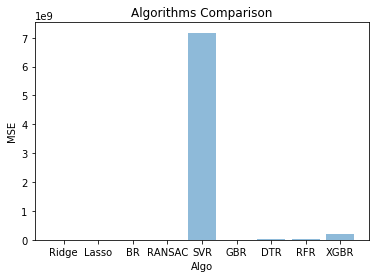

In [68]:
#Bar plot comparison
y_pos = np.arange(len(names))
plt.bar(y_pos, results, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('MSE')
plt.xlabel('Algo')
plt.title('Algorithms Comparison')
plt.show()

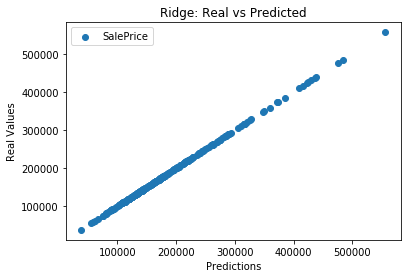

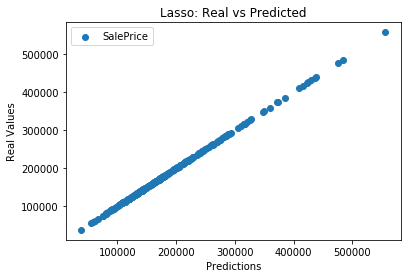

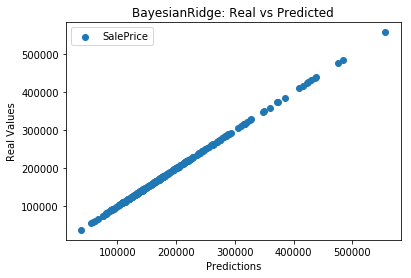

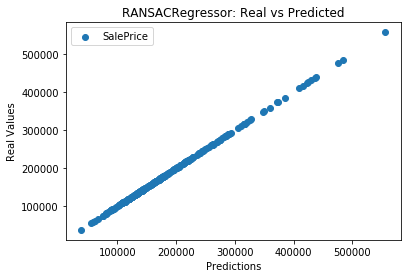

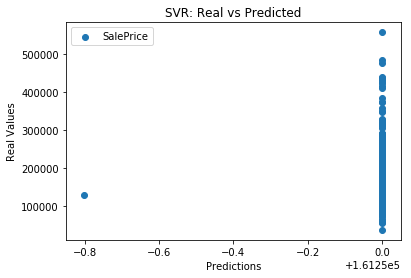

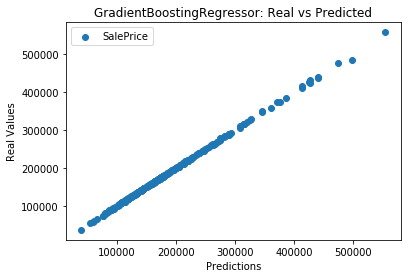

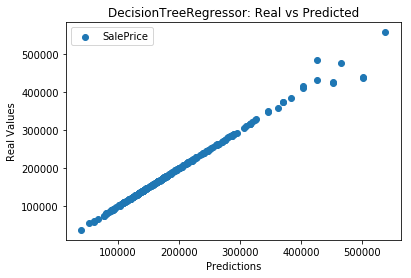

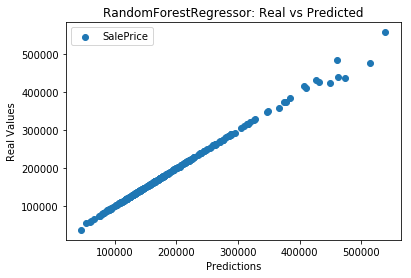

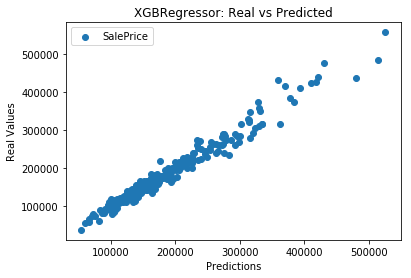

In [2]:
#Comparing scatterplot of each algorithm
for reg in regressors:
    reg.fit(x_train, y_train)  
    name = reg.__class__.__name__
    predictions = reg.predict(x_test)
    plt.scatter(predictions, y_test)
    plt.xlabel('Predictions')
    plt.ylabel('Real Values')
    plt.title(name+': Real vs Predicted')
    plt.legend()
    plt.show()

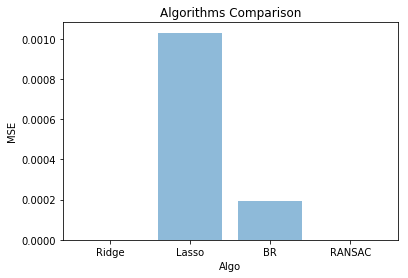

In [70]:
#Bar plot of best 4 algorithm
regressors = [
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.BayesianRidge(),
    linear_model.RANSACRegressor()
]

names = ('Ridge', 'Lasso', 'BR', 'RANSAC')
results = []

for reg in regressors:
    reg.fit(x_train, y_train)  
    name = reg.__class__.__name__  
    predictions = reg.predict(x_test)   
    mse = mean_squared_error(y_test, predictions)
    results.append(mse)
    
y_pos = np.arange(len(names))
plt.bar(y_pos, results, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('MSE')
plt.xlabel('Algo')
plt.title('Algorithms Comparison')
plt.show()

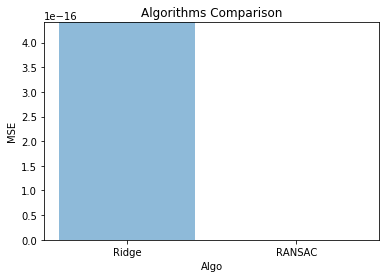

In [71]:
#Bar plot of best 2 algorithm
regressors = [
    linear_model.Ridge(),
    linear_model.RANSACRegressor()
]

names = ('Ridge', 'RANSAC')
results = []

for reg in regressors:
    reg.fit(x_train, y_train)    
    name = reg.__class__.__name__    
    predictions = reg.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    results.append(mse)
    
y_pos = np.arange(len(names))
plt.bar(y_pos, results, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('MSE')
plt.xlabel('Algo')
plt.title('Algorithms Comparison')
plt.show()